In [1]:
import cv2
import pickle
import os.path
import numpy as np
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from keras.models import load_model
import random

LABELS_FILENAME = "model_label.dat"
LETTER_IMAGES_FOLDER = "extracted_letter_images"
MODEL_FILENAME = "captcha_model.hdf5"

Using TensorFlow backend.


In [2]:
# start the data and classes array
data = []
labels = []

# check every input image
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):    
    # load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # change the letter size to make is be 20x20
    image = cv2.resize(image, (20, 20))
    
    
    # add a third dimension to make a 3D tensor which is the way keras spects images to be
    image = np.expand_dims(image, axis=2)
    
        
    # takes the name of the letter from the directory it was in
    label = image_file.split(os.path.sep)[-2]

    # adds the image and the class to the data and labels a lists
    data.append(image)
    labels.append(label)

In [3]:
# turns the image and the label into numpy arrays and normalizes fields in the image
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(20, 20)


C:\Users\olive\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

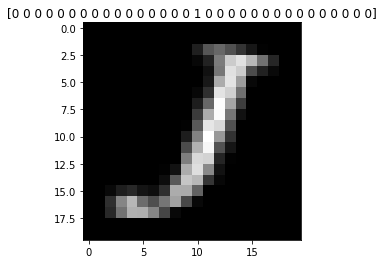

In [5]:
# devides the data into train and test set
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)

# turns the labels into one-hot encoded vectors
lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)

# saves the fittet transformer
pickle.dump(lb, open(LABELS_FILENAME, 'wb'))

# takes away one dimension in order to display the image
# result = X_train[50][:, :, 0]

# print(result.shape)
# plt.imshow(result, cmap = plt.cm.binary)
# plt.title(Y_train[50])

In [6]:
# Build the Neuralnet!
model = Sequential()
# Defines the convolutional layers
model.add(Conv2D(20, (2,2), input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(2))

model.add(Conv2D(50, (2,2), activation="relu"))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(500, activation="relu"))
# output layer with one neuron for each class
model.add(Dense(32, activation="softmax"))

# compiles the nn
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 19, 20)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 50)          4050      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16032     
Tota

In [7]:
history = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, batch_size=128, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 23246 samples, validate on 5812 samples
Epoch 1/5
23246/23246 [==============================] - 20s 880us/step - loss: 0.8746 - acc: 0.8170 - val_loss: 0.0834 - val_acc: 0.9871
Epoch 2/5
23246/23246 [==============================] - 19s 812us/step - loss: 0.0581 - acc: 0.9894 - val_loss: 0.0426 - val_acc: 0.9917 - loss: 0.0619 - acc: - ET - ETA: 1s - loss: 0.0591 - 
Epoch 3/5
23246/23246 [==============================] - 20s 845us/step - loss: 0.0334 - acc: 0.9934 - val_loss: 0.0331 - val_acc: 0.9935
Epoch 4/5
23246/23246 [==============================] - 19s 806us/step - loss: 0.0214 - acc: 0.9951 - val_loss: 0.0279 - val_acc: 0.9940
Epoch 5/5
23246/23246 [==============================] - 19s 816us/step - loss: 0.0138 - acc: 0.9969 - val_loss: 0.0215 - val_acc: 0.9957


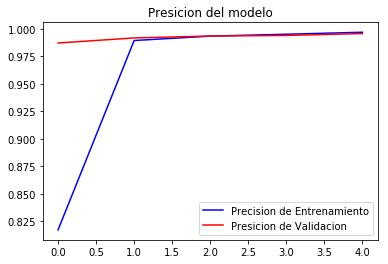

In [8]:
# plots the model's performance
acc = history.history['acc']
val_acc = history.history["val_acc"]
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, Y_test)

9686/9686 [==============================] - 3s 290us/step


In [10]:
# accuracy should be over 95% pretty good!
accuracy

0.9947346685938467

In [11]:
# Saves the model for latter use
model.save(MODEL_FILENAME)